<a href="https://colab.research.google.com/github/daniilprigozhin/NLRome_Align_Tree/blob/main/NLR_CladeFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program takes an immunoprotein sequence for Soy, Maize, or Arabidopsis and returns the clade in which this protein lies in relation to known subspecies. We also return a Shannon Entropy model for analyzing highly variable portions of the protein, which can be viewed on Chimera. Please use Chrome for this process to ensure results.

If the program errors out, please re-run the program from the first cell.

In [ ]:
#@title Install Non-Python Dependencies
#@markdown This block may take 4-5 minutes. If it says your session crashed, do not be alarmed and rerun this code block before running the next code block. This is a bug from importing one of the necessary packages onto Colab.

!pip install -q condacolab &> /dev/null
import condacolab
condacolab.install()
!conda install -c bioconda hmmer &> /dev/null
!conda install -c bioconda mafft &> /dev/null
!pip install Bio &> /dev/null
from collections import defaultdict
from Bio import SearchIO
!conda install -c bioconda epa-ng &> /dev/null
!conda install -c bioconda gappa &> /dev/null
from google.colab import files
!pip install toytree &> /dev/null

from Bio import AlignIO

✨🍰✨ Everything looks OK!


In [ ]:
#@title Install Python Dependencies
!pip install -q gwpy &> /dev/null
!conda install -c bioconda hmmer &> /dev/null
!conda install -c bioconda mafft &> /dev/null
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import toytree       # a tree plotting library
import toyplot       # a general plotting library

In [ ]:
#@title Select Species
Species = "Maize" #@param ["Soy", "Arabidopsis", "Maize"]

%cd /content
!rm -rf NLRome_Align_Tree
!git clone https://github.com/daniilprigozhin/NLRome_Align_Tree &> /dev/null
 
%cd NLRome_Align_Tree/
if Species == 'Soy':
  %cd Soy_NLRome
  common = pd.read_csv("Soy_NLRome_GeneTable.txt", sep='\t')
elif Species == "Arabidopsis":
  %cd Atha_NLRome
  common = pd.read_csv("Atha_NLRome_GeneTable.txt", sep = '\t')
else:
  %cd Maize_NLRome
  common = pd.read_csv("Maize_NLRome_GeneTable.txt", sep = '\t')


clades = common[["Clade", "File"]].groupby("Clade").first()
!unzip All_Clades.zip

/content
/content/NLRome_Align_Tree
/content/NLRome_Align_Tree/Maize_NLRome
Archive:  All_Clades.zip
  inflating: All_Clades.hmm          


In [ ]:
# Code used from https://github.com/sokrypton/ColabFold
import re
import hashlib

def add_hash(x,y):
  return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

query_sequence = 'MEVALGTAKSLLGHVLN SISDDWMKSYVSSAELGTNLNMIKEKMRYARALLDVAKGRDDVVAGNPNLLEQLETLGKKVDEAE  DAVDELHYFMIQDKHDGTRDAAPELGGGLAAQAHHARHAARHTAGNWLSCFSGCCTRDNAAATDAMSGDGGHVGKLSFN  RVAMSNKIKLLIEELQSNSTPVSDLLKIVSDTTNFSSSTKRPPTSSQITQDKLFGRDAIFKKTIDDIIIAKDSGKTLSVLPIFGLGGI GKTRFTQHLYNHTEFEKYFTVRVWICVSTNFDVLRLTKEILSCLPATENAGDKIANDTTNFDLLQKSIAERLKSKRFLIVLDDIW  ECSNNEEWEKLVAPFKKNDTSGNMILVTTRFPKIVDLVKKETNPVDLRGLDPDEFWKFFQICAFGSIQDVEHGDQELIGIARQ  IADKLKCSPLAAKTVGRLLIKKPLQEHWMKILENKQWLEEKNGDDIIPALQISYDYLPFHLKKCFSSFALFPEDYKFDKSEIIRL   WDSIGIIGSSIQQKKIEDIGSNYFDELLDSCFLIKGENDFYVMHDLILDLSRTVSKQDCAYIDCSSFEANNIPQSIRYLSISMHNH   CAQNFEEEMAKLKERIDIKNLRGLMIFGNYIRLQLVNILRDTFKEIRRLRVLSIFIYSHSSLPNNFSELIHLRYLKLNSPSYLEISL   PNTISRFYHLKFLDLKQWGSDRSLPKDISRLENLRHFIASKEFHTNVPEVGKMKFLQELKEFHVKKESVGFELGELGKLAELG   GELNILGLEKVRTEQEAKDAKLMSKRNLVELGLVWNTKQESTSTVDDILDSMQPHSNVRRLFIVNHGGTIGPSWLCSNSNIY   MKNLETLHLESVSWANLPPIGQFNHLRKLRLSKIVGISQIGPGFFGSTTEKSVSHLKAVEFNDMPELVEWVGGASWNIFSGIE   RIKCTNCPRLTGLLISDWSISSIEDNTVWFPNLHDLYINECPKLCLPPLPHTSKVSHIRMGDFSYEGRTMLEINNPSRFAFENL   GDLEKLIVSNALLLSFMDLKKLHSLRHIEVNRCEETFLRGLDDGVVLPTVQSLKLGQFTPTKKSMSNLFKCFPALSSLDVMAS   LSDEDHEEVVLHFPPSSSLRDVTFKGCKNLILPMEEEAGFCGLLSLESVTIRKCDKLFSRWSITGRAAQTQTQSIINPLPPYLR   KLSLYYMETLPQEALLANLTSLEKLTLDNCLGCEQSTERMALPANLASLTSLELVDCRNITMDGFDPRITFSLESLRVYNKRK   HGTDPYSVAADLLVAVVRTKTMPDVSFKLVSIDVDSISGVLVAPICRLLSATLGALKFRNDWRTENFTKEQNEAFQLLTSLVFL   EFDNCMALQSLPQGLHRHPSLKVILIWEPQKIISLPKEGLPDSLRVLQISHCCAELYEACQRLKGTRPDIEVLAHKADVQN' #@param {type:"string"}
# remove whitespaces
query_sequence = "".join(query_sequence.split())
query_sequence = re.sub(r'[^a-zA-Z]','', query_sequence).upper()

jobname = 'RppC' #@param {type:"string"}
# remove whitespaces
jobname = "".join(jobname.split())
jobname = re.sub(r'\W+', '', jobname)
jobname_unhashed = jobname
jobname = add_hash(jobname, query_sequence)

%mkdir {jobname}
%cd {jobname}


with open(f"{jobname}.fasta", "w") as text_file:
    text_file.write(">" + jobname_unhashed + "\n%s" % query_sequence)

/content/NLRome_Align_Tree/Maize_NLRome/RppC_9c750


In [ ]:
#@title Create an Annotated Tree with your protein included
!hmmsearch --domtblout {jobname}.tbl.out ../All_Clades.hmm {jobname}.fasta &> /dev/null

filename = jobname + ".tbl.out"

attribs = ['bias', 'bitscore',  'evalue']

hits = defaultdict(list)
names = []

with open(filename) as handle:
    for queryresult in SearchIO.parse(handle, 'hmmsearch3-domtab'):
      #print(queryresult.id)
      #print(queryresult.accession)
      #print(queryresult.description)
      for hit in queryresult.hsps:
        names.append(queryresult.id)
        for attrib in attribs:
          hits[attrib].append(getattr(hit, attrib))

final = pd.DataFrame.from_dict(hits)
final["Clade"] = names
final.sort_values("bitscore", ascending = False)

#common = pd.read_csv("Soy_NLRome_GeneTable.txt", sep='\t')

final_hv = final.set_index("Clade").join(common[["Clade", "HV", "File"]].groupby("Clade").agg(max), how = 'left', rsuffix = "_other").sort_values("bitscore", ascending = False)
best_afa_file = final_hv.iloc[0,:]["File"]
best_afa = "../" + best_afa_file

!mafft --add {jobname}.fasta --keeplength {best_afa} > {jobname}.updated.afa

clade_oi = common[common["File"] == best_afa_file].iloc[0,:]["Clade"]
tree_oi = best_afa[:best_afa.find("Int")] + "RAxML_bestTree." + clade_oi + ".Raxml.out"
raxml_info_oi = best_afa[:best_afa.find("Int")] + "RAxML_info." + clade_oi + ".Raxml.out"

!epa-ng --split {best_afa} {jobname}.updated.afa --tree {tree_oi} --model {raxml_info_oi}
!cut -f1 -d ' ' {best_afa} > best_afa_f.afa
!epa-ng --ref-msa best_afa_f.afa --tree {tree_oi} -q query.fasta --model {raxml_info_oi} --redo

!gappa examine graft --jplace-path ./ &> /dev/null

tree_created = True

is_hv = final_hv.iloc[0,:]["HV"] == 1

nadd = 1
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 62
done.

Constructing a UPGMA tree (efffree=0) ... 
   60 / 62
done.

Progressive alignment 1/2... 
STEP    14 / 61  f
done.

Making a distance matrix from msa.. 
    0 / 62
done.

Constructing a UPGMA tree (efffree=1) ... 
   60 / 62
done.

Progressive alignment 2/2... 
STEP    12 / 61  f
done.

disttbfast (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --

In [ ]:
#@title View tree
#@markdown Large trees may not display well, consider viewing in an external site.
directory = os.getcwd()
file_name = directory + "/epa_result.newick" 
tre = toytree.tree(file_name)
tre.draw(tip_labels=True);

<svg class="toyplot-canvas-Canvas" height="1000.0px" id="te049796a742a46ac84291c07221cc0ed" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 1000.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> ZM00030AB408540_P001 ZM00036AB417300_P001 ZM00025AB421480_P001 ZM00035AB420600_P001 ZM00024AB414690_P001 ZM00023AB417060_P001 ZM00042AB424390_P001 ZM00021AB412810_P001 ZM00038AB381100_P001 ZM00032AB422890_P001 ZM00026AB407960_P001 ZM00027AB411420_P001 ZM00018AB424810_P001 ZM00020AB411910_P001 ZM00041AB422240_P001 ZM00021AB412880_P001 ZM00035AB420750_P001 ZM00027AB411410_P001 ZM00018AB424800_P001 ZM00026AB407940_P001 ZM00001EB405770_P001 ZM00039AB414290_P001 ZM00028AB416390_P001 ZM00031AB422630_P001 ZM00025AB349690_P001 ZM00037AB340920_P001 ZM00036AB417430_P001 ZM00032AB423190_P001 ZM00029AB422990_P001 ZM00039AB414160_P001 ZM00030AB408680_P001 ZM00035AB420700_P001 ZM00042AB463250_P001 ZM00038AB381200_P001 ZM00039AB414240_P001 ZM00031AB422570_P001 ZM00036AB417330_P001 ZM00032AB423200_P001 ZM00042AB424700_P001 ZM00028AB416340_P001 ZM00039AB414250_P001 ZM00031AB422580_P001 ZM00036AB417360_P001 ZM00039AB414140_P001 ZM00021AB412820_P001 ZM00029AB422950_P001 ZM00026AB407930_P001 ZM00018AB424780_P001 ZM00027AB411400_P001 ZM00018AB424750_P001 RppC ZM00037AB409540_P001 ZM00035AB420720_P001 ZM00030AB408690_P001 ZM00027AB411370_P001 ZM00026AB407830_P001 ZM00018AB424670_P001 ZM00022AB411310_P001 ZM00028AB416320_P001 ZM00034AB431620_P001 ZM00033AB428990_P001 ZM00040AB431310_P001

In [ ]:
#@title This block will tell you if your sequence falls within a highly variable clade.
if is_hv:
  print("Your protein belongs to a highly variable clade.")
else:
  print("Your protein is not in a highly variable clade.")


Your protein belongs to a highly variable clade.


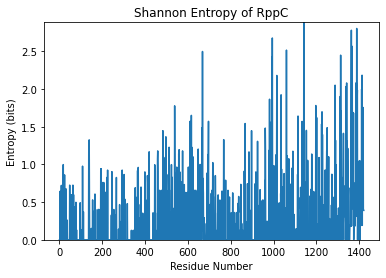

In [ ]:
#@title Above ends the process of tree creation. Here we create a Shannon Entropy model (receommended for proteins in highly variable clades), and print the graphed entropy results.
def entropy(string):
    "Calculates the Shannon entropy of a string"
    string = string.replace("-","")
    # get probability of chars in string
    prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list("ARNDCQEGHILKMFPSTWYV")) ]

    # calculate the entropy
    entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob if p > 0])

    return entropy

gene = query_sequence
cn = jobname_unhashed
file_oi = jobname + ".updated.afa"

align = AlignIO.read(file_oi, "fasta")

length = len(align[1,:])
entropies = []
for i in range(length):
  col = align[:,i]
  if col[len(align) - 1] == "-":
    continue
  entropies.append(entropy(col))

f = open(jobname+"_Chimera_Entropy.txt", "w")
f.write("attribute: shannonEntropy\n")
f.write("match mode: 1-to-1\n")
f.write("recipient: residues\n")
for i in range(1,len(entropies)+1):
  f.write("\t:")
  f.write(str(i))
  f.write("\t")
  f.write(str(entropies[i-1]))
  f.write("\n")
f.close()

ylim = max(max(entropies), 2.5)

plt.ylim(0,ylim);
plt.plot(entropies);
plt.xlabel("Residue Number");
plt.ylabel("Entropy (bits)");
plt.title("Shannon Entropy of "+jobname_unhashed);
plt.savefig(jobname + "_Entropy_MaskedNG");

shannon_created = True

In [ ]:
#@title Download Results
#@markdown Our assembled zip file contains the tree created in Newick format and an updated aligned fasta format of your sequence against all other proteins in your species. \
#@markdown \
#@markdown If a Shannon Entropy model was generated, it also includes the Chimera-formatted entropy mapping, as well as the graph generated above of entropy per residue. \
#@markdown \
#@markdown If you are having issues downloading the result, try disabling your adblocker and run this cell again. If that fails click on the folder icon to the left, navigate to /content, and manually download {jobname}_results.zip.

new_folder = jobname_unhashed + "_results"
!mkdir {new_folder}
!mv {jobname}.updated.afa {new_folder}
!mv epa_result.newick {new_folder}
if shannon_created:
  %mv {jobname}_Chimera_Entropy.txt {new_folder}
  %mv {jobname}_Entropy_MaskedNG.png {new_folder}

!mv {new_folder} ../../../
%cd /content
!zip -r {new_folder}.zip {new_folder}
res = new_folder + ".zip"
files.download(res)

/content
  adding: RppC_results/ (stored 0%)
  adding: RppC_results/RppC_9c750_Chimera_Entropy.txt (deflated 71%)
  adding: RppC_results/RppC_9c750_Entropy_MaskedNG.png (deflated 4%)
  adding: RppC_results/epa_result.newick (deflated 72%)
  adding: RppC_results/RppC_9c750.updated.afa (deflated 93%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**References:**

A. Stamatakis: "RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies". In Bioinformatics, 2014, open access.

Eaton DAR. Toytree: A minimalist tree visualization and manipulation library for Python. Methods Ecol Evol. 2020;11:187–191. https://doi.org/10.1111/2041-210X.13313

Haun WJ, Hyten DL, Xu WW, Gerhardt DJ, Albert TJ, Richmond T, Jeddeloh JA, Jia G, Springer NM, Vance CP, Stupar RM. The composition and origins of genomic variation among individuals of the soybean reference cultivar Williams 82. Plant Physiol. 2011 Feb;155(2):645-55. doi: 10.1104/pp.110.166736. Epub 2010 Nov 29. PMID: 21115807; PMCID: PMC3032456.

Jumper, J et al. Highly accurate protein structure prediction with AlphaFold. Nature (2021).

Katoh K, Standley DM. MAFFT multiple sequence alignment software version 7: improvements in performance and usability. Mol Biol Evol. 2013 Apr;30(4):772-80. doi: 10.1093/molbev/mst010. Epub 2013 Jan 16. PMID: 23329690; PMCID: PMC3603318.

Varadi, M et al. AlphaFold Protein Structure Database: massively expanding the structural coverage of protein-sequence space with high-accuracy models. Nucleic Acids Research (2021).



